<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/Copy_of_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [437]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary
from sklearn.model_selection import train_test_split

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



In [438]:
# 1. Fitting a line to the curve

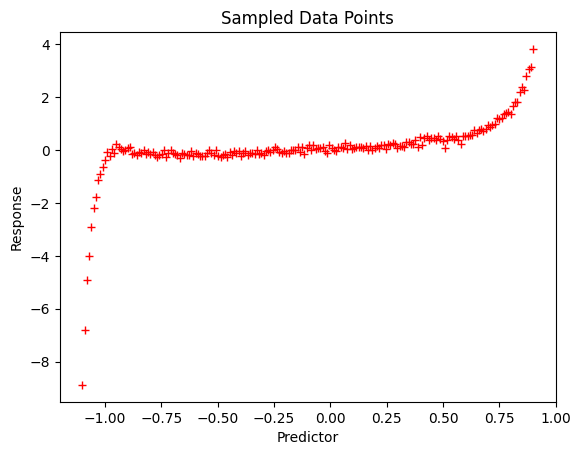

In [439]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 200)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(200) * 0.1

    return x, y

predictor, response = gen_data()

x_val = predictor
y_val = response
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [440]:
# your code here
print(predictor.shape,response.shape)

(200,) (200,)


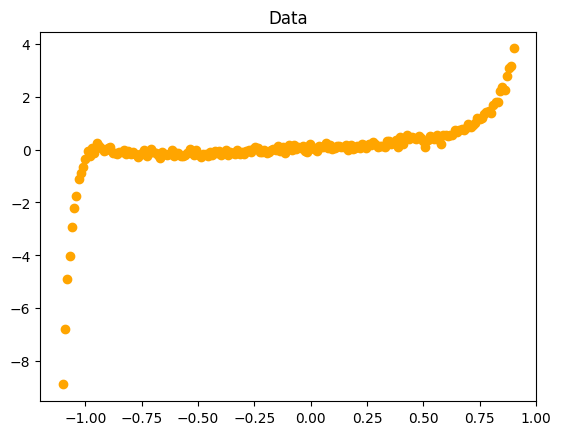

In [441]:
def plotData(X,y,color="orange",title="Data"):
  plt.title(title)

  plt.scatter(X,y,c=color)
  plt.show()

plotData(predictor,response)

In [442]:
def Data_Normalisation(predictor):
  predictor = (predictor-predictor.mean())/predictor.std()
  return predictor


In [443]:
val = Data_Normalisation(predictor)
print(val)

[-1.7234121  -1.70609137 -1.68877065 -1.67144992 -1.6541292  -1.63680847
 -1.61948775 -1.60216702 -1.5848463  -1.56752558 -1.55020485 -1.53288413
 -1.5155634  -1.49824268 -1.48092195 -1.46360123 -1.4462805  -1.42895978
 -1.41163905 -1.39431833 -1.3769976  -1.35967688 -1.34235616 -1.32503543
 -1.30771471 -1.29039398 -1.27307326 -1.25575253 -1.23843181 -1.22111108
 -1.20379036 -1.18646963 -1.16914891 -1.15182818 -1.13450746 -1.11718674
 -1.09986601 -1.08254529 -1.06522456 -1.04790384 -1.03058311 -1.01326239
 -0.99594166 -0.97862094 -0.96130021 -0.94397949 -0.92665877 -0.90933804
 -0.89201732 -0.87469659 -0.85737587 -0.84005514 -0.82273442 -0.80541369
 -0.78809297 -0.77077224 -0.75345152 -0.73613079 -0.71881007 -0.70148935
 -0.68416862 -0.6668479  -0.64952717 -0.63220645 -0.61488572 -0.597565
 -0.58024427 -0.56292355 -0.54560282 -0.5282821  -0.51096138 -0.49364065
 -0.47631993 -0.4589992  -0.44167848 -0.42435775 -0.40703703 -0.3897163
 -0.37239558 -0.35507485 -0.33775413 -0.3204334  -0.30

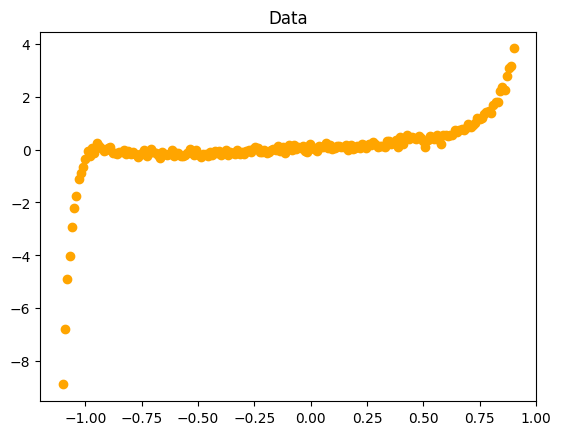

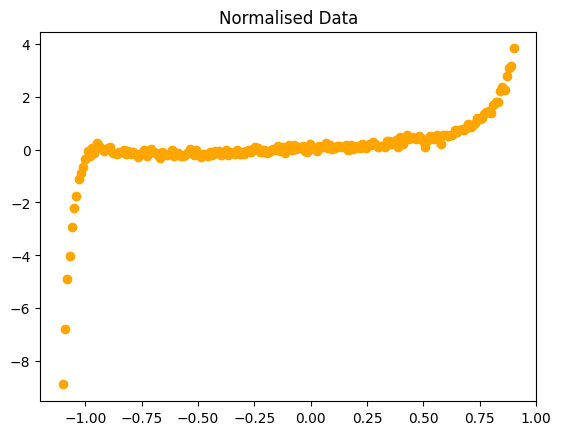

In [444]:
plotData(predictor,response,"orange","Data")
# predictor = Data_Normalisation(predictor)
plotData(predictor,response,"orange","Normalised Data")

In [445]:
def trainTestSplit(predictor,response,split=0.8):
  m = predictor.shape[0]

  data = np.zeros((m,2))

  data[:,0] = predictor
  data[:,1] = response

  np.random.shuffle(data)

  split = int(m*split)

  # X TRAINING
  predictor_Training = data[:split,0]

  # y TRAINING
  response_Training = data[:split,1]

  # X TESTING

  predictor_test = data[split:,0]

  # y TESTING

  response_test = data[split:,1]

  return predictor_Training,response_Training,predictor_test,response_test


In [446]:
predictor_Training,response_Training,predictor_test,response_test = trainTestSplit(predictor,response)

print(predictor_Training.shape,response_Training.shape,predictor_test.shape,response_test.shape)

(160,) (160,) (40,) (40,)


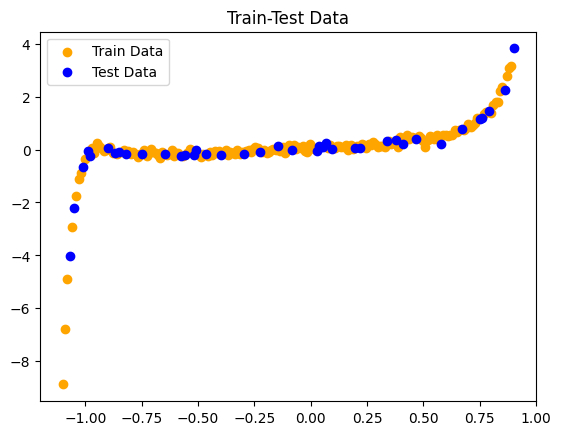

In [447]:
plt.scatter(predictor_Training,response_Training,color="orange",label="Train Data")
plt.scatter(predictor_test,response_test,color="blue",label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [448]:
from binascii import b2a_uu
#Hypothesis Function

def hypothesis(predictor,beta):
  # h(beta) = beta(0) + beta(1)*X
  return beta[0] + beta[1]*predictor

 #loss function
def error(predictor,response,beta):

 #calculation of J(beta)
  m = predictor.shape[0]
  e = 0

  for i in range(m):
    response_i = hypothesis(predictor[i],beta)
    e = e + (response[i]-response_i)**2

  return e/(2*m)


def gradient(predictor,response,beta):

  m = predictor.shape[0]

  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(predictor[i],beta)-response[i]

    grad[0] = grad[0] + exp

    grad[1] = grad[1] + exp*predictor[i]


  return grad/m



# Training of data
def train(predictor,response,learning_rate=0.1,maxItrs=100):

  beta = np.zeros((2,))
  error_list = []


  for i in range(maxItrs):
    grad = gradient(predictor,response,beta)
    error_list.append(error(predictor,response,beta))

    beta[0] = beta[0] - learning_rate*grad[0]
    beta[1] = beta[1] - learning_rate*grad[1]

  plt.xlabel("Number of Iterations")
  plt.ylabel("Loss")
  plt.plot(error_list)
  return beta


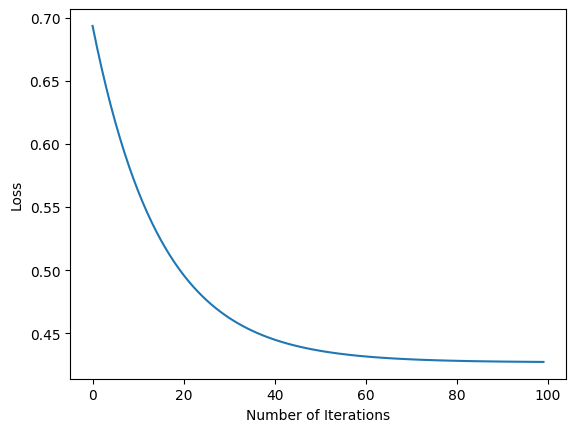

In [449]:
beta = train(predictor,response)

In [450]:
def predict(prediction,beta):
  return hypothesis(prediction,beta)

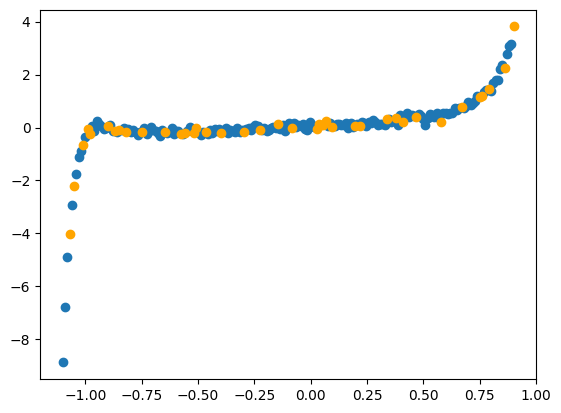

In [451]:
plt.scatter(predictor_Training,response_Training)
plt.scatter(predictor_test,response_test,color="orange")
plt.show()

In [452]:
response_result = predict(predictor_test,beta)

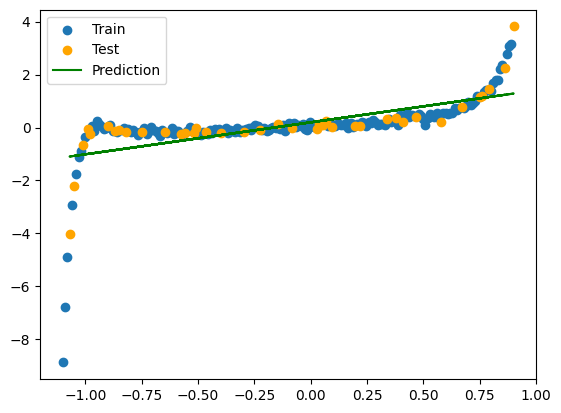

In [453]:
plt.scatter(predictor_Training,response_Training,label="Train")
plt.scatter(predictor_test,response_test,color="orange",label="Test")
plt.plot(predictor_test,response_result,color="green",label="Prediction")
plt.legend()
plt.show()

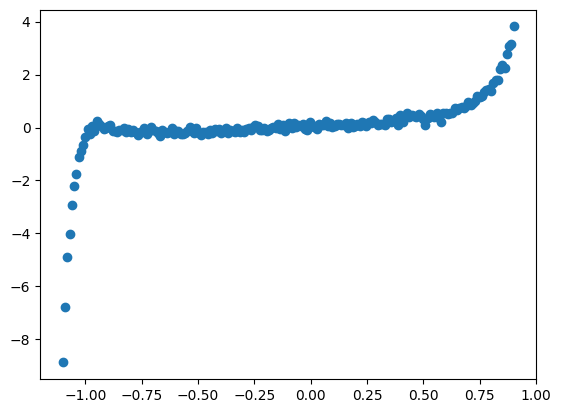

In [454]:
plt.scatter(x_val,y_val,label="Points")

In [455]:
# Model Evaluation
def r2Score(response,response_result):
  response_mean = response.mean()
  num = np.sum((response-response_result)**2)
  denom = np.sum((response-response_mean)**2)

  return 1- num/denom

r2Score(response_test,response_result)


0.4950700701630253

In [456]:
# 2. Fit a polynomial to the curve

In [457]:
#print(predictor,response)
predictor.shape
# np.random.shuffle(predictor)

predictor = predictor.reshape((200, 1))
predictor.shape
n_degree = 15

In [458]:
def Addition_of_features(n_degree,predictor):

  additional_features = np.zeros((200, n_degree-1))
  predictor = np.concatenate((predictor, additional_features), axis=1)
  for i in range(200):
    for j in range(n_degree):

      if j==0:
        continue

      predictor[i][j] = predictor[i][0]**(j+1)

  return predictor


In [459]:
def Data_Normalisation_polynomial(predictor):
  u = predictor.mean(axis=0)
  std = predictor.std(axis=0)

  return (predictor-u)/std

In [460]:
def train_test_split_polynomial(predictor,response):
  # predictor_Training,predictor_test,response_Training,response_test = trainTestSplit_polynomial(predictor,response)
  predictor_Training,predictor_test,response_Training,response_test = train_test_split(predictor,response,test_size=0.3,shuffle=True,random_state=0)
  return predictor_Training,predictor_test,response_Training,response_test

In [461]:
def preprocess(predictor,degree):
  # add a column of 1s in X as the 0th column
  if predictor.shape[1] == degree:

    m = predictor.shape[0]
    ones = np.ones((m,1))

    # adding 1 as row in X
    predictor = np.hstack((ones,predictor))

  return predictor

In [462]:

# Below is vectorized way of multiplication, it is faster than using loops
def hypothesis_polynomial(X,theta):
  # X - (m,n+1), theta - (n+1,1)
  # return dim (m,1)
  return np.dot(X,theta)


def loss_polynomial(X,y,theta):
  yp = hypothesis_polynomial(X,theta)
  # yp - (m,1)

  m = yp.shape[0]

  # print(yp.shape,y.shape)
  error = np.sum((y-yp)**2)
  error = error/(2*m)

  return error

def gradient_polynomial(X,y,theta):
  yp = hypothesis_polynomial(X,theta)

  grad = np.dot(X.T,(yp-y))
  m = X.shape[0]

  return grad/m

def train_polynomial(X,y,learning_rate=0.1,max_iters=200):

  n = X.shape[1]

  beta = np.random.randn(n)

  error_list = []

  for i in range(max_iters):

    e = loss_polynomial(X,y,beta)

    grad = gradient_polynomial(X,y,beta)

    # print(grad.shape)
    beta = beta - learning_rate*grad

    error_list.append(e)

  # plt.plot(error_list)
  return beta


In [463]:
def r2Score_polynomial(response,response_p):
  response_mean = response.mean()
  num = np.sum((response-response_p)**2)
  denom = np.sum((response-response_mean)**2)
  return 1 - num/denom

In [464]:
r2_score=0
res_degree=0

result_predictor_test = predict
result_response_test = response
result_predictor_train = predict
result_response_train = response
result_response_p = response
for i in range(26):
  if i==0 or i==1:
    continue

  res_predictor = predictor
  res_response = response
  res_predictor = Addition_of_features(i,res_predictor)
  res_predictor = Data_Normalisation_polynomial(res_predictor)

  res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

  res_predictor_train = preprocess(res_predictor_train,i)
  res_predictor_test = preprocess(res_predictor_test,i)

  beta = train_polynomial(res_predictor_train,res_response_train)
  # print(beta)

  res_response_p = hypothesis_polynomial(res_predictor_test,beta)
  r2_val = r2Score_polynomial(res_response_test,res_response_p)
  print(r2_val)
  if r2_val > r2_score:
    r2_score = r2_val
    res_degree = i
    result_predictor_test = res_predictor_test
    result_predictor_train = res_predictor_train
    result_response_test = res_response_test
    result_response_train = res_response_train
    result_response_p = res_response_p



0.35462287699198325
0.4131218456024577
0.37788301851313344
0.3484001453142218
0.3263568367445354
0.5044642739178402
0.49104557727278086
0.5781481116658476
0.5790912983220935
0.6354826938924935
0.7466987211452816
0.795518843079479
0.6039704661829994
0.8449637334633735
0.7428529770111363
0.8732059010537156
0.9209395396841196
0.8637879042914673
0.8232010032283998
0.9243271621697484
-523415891394427.4
-3.633503544219802e+31
-4.2928211734705526e+48
-4.974395041801484e+61


In [465]:
print(r2_score)
print(res_degree)

0.9243271621697484
21


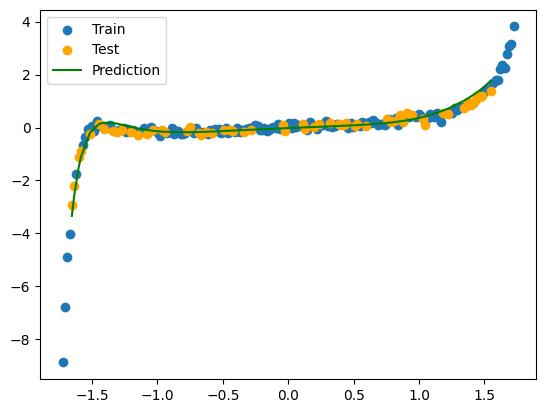

In [466]:
# predictor_test = predictor_test.reshape((predictor_test.shape[0],))


sorted_indices = result_predictor_test.T[1].argsort()

# Sort predictor_test.T[1] and response_test based on the sorted indices
sorted_predictor = result_predictor_test.T[1][sorted_indices]
sorted_response = result_response_p[sorted_indices]

plt.scatter(result_predictor_train.T[1],result_response_train,label="Train")
plt.scatter(result_predictor_test.T[1],result_response_test,color="orange",label="Test")
plt.plot(sorted_predictor,sorted_response,color="green",label="Prediction")
plt.legend()
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

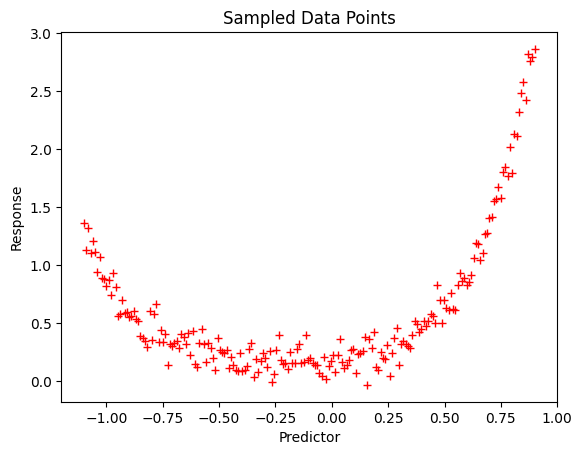

(200,) (200,)


In [467]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 200)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(200) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()
print(predictor_low.shape,response_low.shape)

In [468]:
# your code here
predictor_low = predictor_low.reshape((200, 1))
r2_score=0
res_degree=21

result_predictor_test = predictor_low
result_response_test = response_low
result_predictor_train = predictor_low
result_response_train = response_low
result_response_p = response_low


res_predictor = predictor_low
res_response = response_low
res_predictor = Addition_of_features(res_degree,res_predictor)
res_predictor = Data_Normalisation_polynomial(res_predictor)

res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

res_predictor_train = preprocess(res_predictor_train,res_degree)
res_predictor_test = preprocess(res_predictor_test,res_degree)

beta = train_polynomial(res_predictor_train,res_response_train)
# print(beta)

res_response_p = hypothesis_polynomial(res_predictor_test,beta)
r2_val = r2Score_polynomial(res_response_test,res_response_p)
print(r2_val)



0.9063208831022318


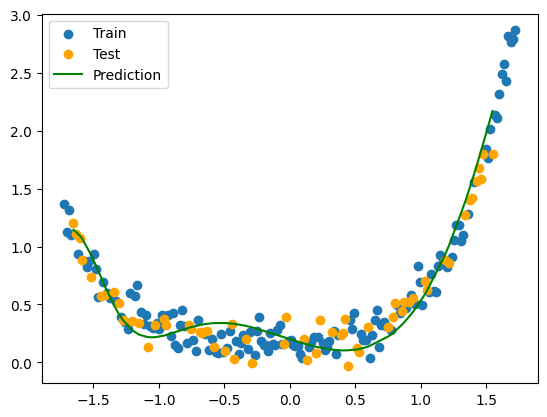

In [469]:
# predictor_test = predictor_test.reshape((predictor_test.shape[0],))


sorted_indices = res_predictor_test.T[1].argsort()

# Sort predictor_test.T[1] and response_test based on the sorted indices
sorted_predictor = res_predictor_test.T[1][sorted_indices]
sorted_response = res_response_p[sorted_indices]

plt.scatter(res_predictor_train.T[1],res_response_train,label="Train")
plt.scatter(res_predictor_test.T[1],res_response_test,color="orange",label="Test")
plt.plot(sorted_predictor,sorted_response,color="green",label="Prediction")
plt.legend()
plt.show()

In [470]:
# L1 Regularization

In [471]:
# Below is vectorized way of multiplication, it is faster than using loops
def hypothesis_polynomial_l1_regularization(X,theta):
  # X - (m,n+1), theta - (n+1,1)
  # return dim (m,1)
  return np.dot(X,theta)


def loss_polynomial_l1_regularization(X, y, theta, lambda_reg):
    yp = hypothesis_polynomial(X, theta)
    m = yp.shape[0]

    error = np.sum((y - yp) ** 2)
    regularization_term = lambda_reg * np.sum(np.abs(theta))  # L1 regularization term

    total_loss = (error + regularization_term) / (2 * m)

    return total_loss


def gradient_polynomial_l1_regularization(X, y, theta, lambda_reg):
    yp = hypothesis_polynomial(X, theta)
    m = X.shape[0]

    grad = np.dot(X.T, (yp - y))
    regularization_term = lambda_reg * np.sign(theta)  # Derivative of |theta| is sign(theta)

    total_grad = (grad + regularization_term) / m

    return total_grad


def train_polynomial_l1_regularization(X, y, learning_rate=0.1, lambda_reg=0.01, max_iters=200):
    n = X.shape[1]

    beta = np.random.randn(n)

    error_list = []

    for i in range(max_iters):

        e = loss_polynomial_l1_regularization(X, y, beta, lambda_reg)

        grad = gradient_polynomial_l1_regularization(X, y, beta, lambda_reg)

        beta = beta - learning_rate * grad

        error_list.append(e)

    return beta


In [472]:
  res_predictor_l1_regularization = predictor_low
  res_response_l1_regularization = response_low
  res_predictor_l1_regularization = Addition_of_features(res_degree,res_predictor_l1_regularization)
  res_predictor_l1_regularization = Data_Normalisation_polynomial(res_predictor_l1_regularization)

  res_predictor_train_l1_regularization,res_predictor_test_l1_regularization,res_response_train_l1_regularization,res_response_test_l1_regularization = train_test_split_polynomial(res_predictor_l1_regularization,res_response_l1_regularization)

  res_predictor_train_l1_regularization = preprocess(res_predictor_train_l1_regularization,res_degree)
  res_predictor_test_l1_regularization = preprocess(res_predictor_test_l1_regularization,res_degree)

  beta = train_polynomial_l1_regularization(res_predictor_train_l1_regularization,res_response_train_l1_regularization)
  # print(beta)

  res_response_p_l1_regularization = hypothesis_polynomial_l1_regularization(res_predictor_test_l1_regularization,beta)
  r2_val = r2Score_polynomial(res_response_test_l1_regularization,res_response_p_l1_regularization)



In [473]:
print(r2_val)

0.9393962064096244


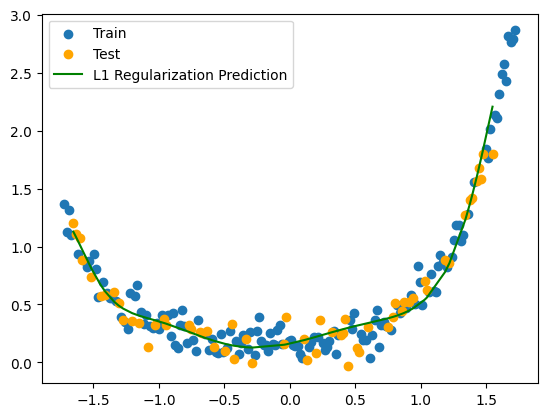

In [474]:
sorted_indices = res_predictor_test_l1_regularization.T[1].argsort()

# Sort predictor_test.T[1] and response_test based on the sorted indices
sorted_predictor = res_predictor_test_l1_regularization.T[1][sorted_indices]
sorted_response = res_response_p_l1_regularization[sorted_indices]

plt.scatter(res_predictor_train_l1_regularization.T[1],res_response_train_l1_regularization,label="Train")
plt.scatter(res_predictor_test.T[1],res_response_test,color="orange",label="Test")
plt.plot(sorted_predictor,sorted_response,color="green",label="L1 Regularization Prediction")
plt.legend()
plt.show()

In [475]:
# L2 Regularization

In [476]:
# Below is vectorized way of multiplication, it is faster than using loops
def hypothesis_polynomial_l2_regularization(X,theta):
  # X - (m,n+1), theta - (n+1,1)
  # return dim (m,1)
  return np.dot(X,theta)

def loss_polynomial_l2_regularization(X, y, theta, lambda_reg):
    yp = hypothesis_polynomial(X, theta)
    m = yp.shape[0]

    error = np.sum((y - yp) ** 2)
    regularization_term = lambda_reg * np.sum(theta ** 2)  # L2 regularization term

    total_loss = (error + regularization_term) / (2 * m)

    return total_loss

def gradient_polynomial_l2_regularization(X, y, theta, lambda_reg):
    yp = hypothesis_polynomial(X, theta)
    m = X.shape[0]

    grad = np.dot(X.T, (yp - y))
    regularization_term = lambda_reg * theta  # Derivative of theta^2 is 2 * theta

    total_grad = (grad + regularization_term) / m

    return total_grad

def train_polynomial_l2_regularization(X, y, learning_rate=0.1, lambda_reg=0.01, max_iters=200):
    n = X.shape[1]
    beta = np.random.randn(n)
    error_list = []

    for i in range(max_iters):
        e = loss_polynomial_l2_regularization(X, y, beta, lambda_reg)
        grad = gradient_polynomial_l2_regularization(X, y, beta, lambda_reg)
        beta = beta - learning_rate * grad
        error_list.append(e)

    return beta


In [477]:
res_predictor_l2_regularization = predictor_low
res_response_l2_regularization = response_low
res_predictor_l2_regularization = Addition_of_features(res_degree,res_predictor_l2_regularization)
res_predictor_l2_regularization = Data_Normalisation_polynomial(res_predictor_l2_regularization)

res_predictor_train_l2_regularization,res_predictor_test_l2_regularization,res_response_train_l2_regularization,res_response_test_l2_regularization = train_test_split_polynomial(res_predictor_l2_regularization,res_response_l2_regularization)

res_predictor_train_l2_regularization = preprocess(res_predictor_train_l2_regularization,res_degree)
res_predictor_test_l2_regularization = preprocess(res_predictor_test_l2_regularization,res_degree)

beta = train_polynomial_l2_regularization(res_predictor_train_l2_regularization,res_response_train_l2_regularization)
# print(beta)

res_response_p_l2_regularization = hypothesis_polynomial_l2_regularization(res_predictor_test_l2_regularization,beta)
r2_val = r2Score_polynomial(res_response_test_l2_regularization,res_response_p_l2_regularization)

print(r2_val)

0.9460057333872895


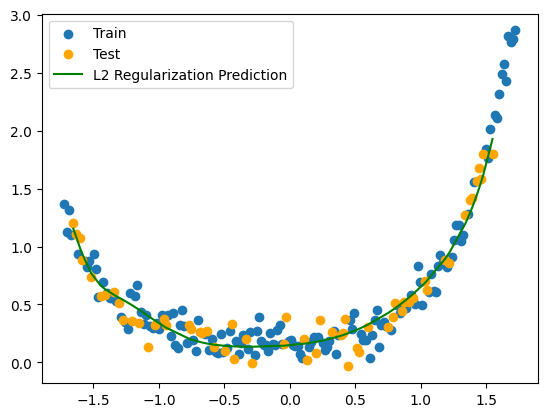

In [478]:
sorted_indices = res_predictor_test_l2_regularization.T[1].argsort()

# Sort predictor_test.T[1] and response_test based on the sorted indices
sorted_predictor = res_predictor_test_l2_regularization.T[1][sorted_indices]
sorted_response = res_response_p_l2_regularization[sorted_indices]

plt.scatter(res_predictor_train_l2_regularization.T[1],res_response_train_l2_regularization,label="Train")
plt.scatter(res_predictor_test.T[1],res_response_test,color="orange",label="Test")
plt.plot(sorted_predictor,sorted_response,color="green",label="L2 Regularization Prediction")
plt.legend()
plt.show()

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [479]:
credit = pd.read_csv('credit.csv')
credit.head()

print(credit.shape)

(400, 7)


In [480]:
X = credit.iloc[:400, :6]
y = credit.iloc[:400,6:7]

In [481]:
print(X.shape)
print(y.shape)

(400, 6)
(400, 1)


In [482]:
print(X)

      Income  Limit  Rating  Cards  Age  Education
0     14.891   3606     283      2   34         11
1    106.025   6645     483      3   82         15
2    104.593   7075     514      4   71         11
3    148.924   9504     681      3   36         11
4     55.882   4897     357      2   68         16
..       ...    ...     ...    ...  ...        ...
395   12.096   4100     307      3   32         13
396   13.364   3838     296      5   65         17
397   57.872   4171     321      5   67         12
398   37.728   2525     192      1   44         13
399   18.701   5524     415      5   64          7

[400 rows x 6 columns]


In [483]:
print(y)

y = y.squeeze()
print(y.shape)

     Balance
0        333
1        903
2        580
3        964
4        331
..       ...
395      560
396      480
397      138
398        0
399      966

[400 rows x 1 columns]
(400,)


In [484]:
# With All factors in consideration


r2_score=0
res_degree=6



res_predictor = X
res_response = y

res_predictor = Data_Normalisation_polynomial(res_predictor)

res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

res_predictor_train = preprocess(res_predictor_train,res_degree)
res_predictor_test = preprocess(res_predictor_test,res_degree)

beta = train_polynomial(res_predictor_train,res_response_train)
# print(beta)

res_response_p = hypothesis_polynomial(res_predictor_test,beta)
r2_val = r2Score_polynomial(res_response_test,res_response_p)
print(r2_val)


0.8566078944768329


In [485]:
X_new = credit.iloc[:400,[0,1,2,4,5]]
print(X_new)

      Income  Limit  Rating  Age  Education
0     14.891   3606     283   34         11
1    106.025   6645     483   82         15
2    104.593   7075     514   71         11
3    148.924   9504     681   36         11
4     55.882   4897     357   68         16
..       ...    ...     ...  ...        ...
395   12.096   4100     307   32         13
396   13.364   3838     296   65         17
397   57.872   4171     321   67         12
398   37.728   2525     192   44         13
399   18.701   5524     415   64          7

[400 rows x 5 columns]


In [486]:
# With All factors in consideration without cards factor


r2_score=0
res_degree=5



res_predictor = X_new
res_response = y

res_predictor = Data_Normalisation_polynomial(res_predictor)

res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

res_predictor_train = preprocess(res_predictor_train,res_degree)
res_predictor_test = preprocess(res_predictor_test,res_degree)

beta = train_polynomial(res_predictor_train,res_response_train)
# print(beta)

res_response_p = hypothesis_polynomial(res_predictor_test,beta)
r2_val = r2Score_polynomial(res_response_test,res_response_p)
print(r2_val)


0.8549146902730674


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [487]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [488]:
# your code here
print(sharks.shape)

(84, 5)


In [489]:
X = sharks.iloc[:84,[0,1,3,4]]
print(X)

y = sharks.iloc[:84,[2]]
print(y)
y = y.squeeze()

    Year  Month  Temperature  IceCreamSales
0   2008      1    11.900000             76
1   2008      2    15.200000             79
2   2008      3    17.200000             91
3   2008      4    18.500000             95
4   2008      5    19.400000            103
..   ...    ...          ...            ...
79  2014      8    23.744268            101
80  2014      9    23.585229             78
81  2014     10    17.719383             94
82  2014     11    16.472557             72
83  2014     12    14.686391             68

[84 rows x 4 columns]
    SharkAttacks
0             25
1             28
2             32
3             35
4             38
..           ...
79            36
80            42
81            50
82            27
83            32

[84 rows x 1 columns]


In [490]:

r2_score=0
res_degree=4



res_predictor = X
res_response = y

res_predictor = Data_Normalisation_polynomial(res_predictor)

res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

res_predictor_train = preprocess(res_predictor_train,res_degree)
res_predictor_test = preprocess(res_predictor_test,res_degree)

beta = train_polynomial(res_predictor_train,res_response_train)
# print(beta)

res_response_p = hypothesis_polynomial(res_predictor_test,beta)
r2_val = r2Score_polynomial(res_response_test,res_response_p)
print(r2_val)


0.21482107173698783


In [491]:
X_new = sharks.iloc[:84,[1,3]]
print(X_new)

    Month  Temperature
0       1    11.900000
1       2    15.200000
2       3    17.200000
3       4    18.500000
4       5    19.400000
..    ...          ...
79      8    23.744268
80      9    23.585229
81     10    17.719383
82     11    16.472557
83     12    14.686391

[84 rows x 2 columns]


In [492]:

r2_score=0
res_degree=2



res_predictor = X_new
res_response = y

res_predictor = Data_Normalisation_polynomial(res_predictor)

res_predictor_train,res_predictor_test,res_response_train,res_response_test = train_test_split_polynomial(res_predictor,res_response)

res_predictor_train = preprocess(res_predictor_train,res_degree)
res_predictor_test = preprocess(res_predictor_test,res_degree)

beta = train_polynomial(res_predictor_train,res_response_train)
# print(beta)

res_response_p = hypothesis_polynomial(res_predictor_test,beta)
r2_val = r2Score_polynomial(res_response_test,res_response_p)
print(r2_val)


0.12403649544784412
